## [Personal Key Indicators of Heart Disease 데이터 분석] 
 * [의료-심장병]
 * 건강 상태와 관련된 40만 명의 성인을 대상으로 한 2020년 연간 CDC 설문 조사 데이터
 * 데이터 출처 : https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
 
 * 데이터 분석 코드
   * [github 코드](https://github.com/LDJWJ/dataAnalysis/blob/main/01_10_Heart_Disease.ipynb)
   * [HTML코드](https://ldjwj.github.io/dataAnalysis/01_10_Heart_Disease.html)

### 데이터 셋 개요
 * 데이터 파일
   * heart_2020_cleaned.csv

### 데이터 설명

* Input/output variables 

### 라이브러리 불러오기

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### 데이터 불러오기

In [2]:
HDisease = pd.read_csv("../dataset/HeartDisease/heart_2020_cleaned.csv")

HDisease.shape, HDisease.columns

((319795, 18),
 Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
        'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
        'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
        'Asthma', 'KidneyDisease', 'SkinCancer'],
       dtype='object'))

* 데이터 셋 : 319795개 18열

In [3]:
HDisease.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
HDisease.HeartDisease.unique()

array(['No', 'Yes'], dtype=object)

In [5]:
### 데이터 전처리
HDisease.loc[ HDisease['HeartDisease']=="No" ,   'HeartDisease_0_1'] = 0
HDisease.loc[ HDisease['HeartDisease']=="Yes" ,   'HeartDisease_0_1'] = 1

HDisease['HeartDisease_0_1'] = HDisease['HeartDisease_0_1'].astype("int32")
HDisease.HeartDisease_0_1.unique()

array([0, 1])

In [6]:
HDisease.info()  # 결측치 없음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### 미션 - 입력 데이터를 이용하여 심장병을 예측 

In [7]:
HDisease.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease_0_1'],
      dtype='object')

In [8]:
HDisease.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_0_1
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,0
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,0
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,0
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,0
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,0


In [9]:
HDisease.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease_0_1'],
      dtype='object')

In [10]:
# BMI, PyysicalHealth, MentalHealth, SleepTime
sel = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

X = HDisease[sel]
y = HDisease['HeartDisease_0_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((223856, 4), (95939, 4), (223856,), (95939,))

<AxesSubplot:xlabel='HeartDisease_0_1', ylabel='count'>

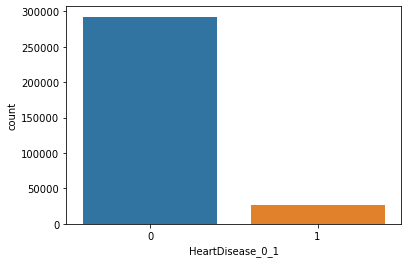

In [11]:
sns.countplot(x="HeartDisease_0_1", data=HDisease)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
print("의사결정트리 score :", model1.score(X_train, y_train), model1.score(X_test, y_test) )

의사결정트리 score : 0.9500437781430919 0.8852187327364263


In [15]:
model2 = RandomForestClassifier(max_depth=4, n_estimators=30, random_state=0)
model2.fit(X_train, y_train)
print("랜덤포레스트 score :", model2.score(X_train, y_train), model2.score(X_test, y_test) )

랜덤포레스트 score : 0.9143913944678722 0.914435214042256


### 최종 모델로 예측 후, mse, rmse 구하기

In [16]:
model1 = RandomForestClassifier(max_depth=4, n_estimators=30, random_state=0)
model1.fit(X_train, y_train)
pred = model1.predict(X_test)

In [17]:
# mse, rmse
mse_val = np.sum(  (pred - y_test) ** 2 ) / len(pred)
rmse_val = np.sqrt(mse_val)

print(f"mse value : {mse_val} rmse value : {rmse_val}")

mse value : 0.08556478595774399 rmse value : 0.29251459101683114
